In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

#Task 1

Implement nonlinear Transformation functions

i. Log Transformation

Text(0.5, 1.0, 'Log Transformation')

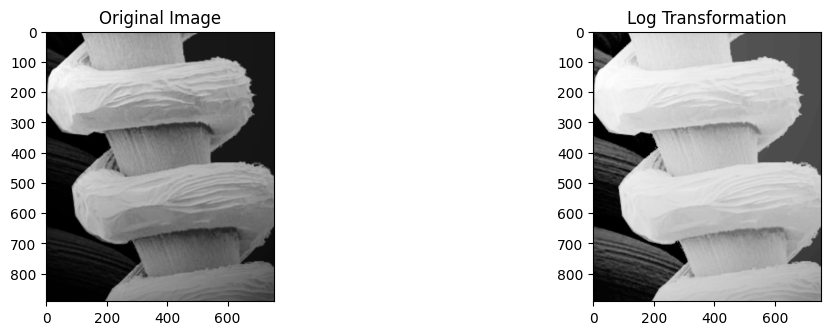

In [ ]:
r = plt.imread("image1.tif")

s = np.log(1 + r)
c = ((s - s.min()) / (s.max() - s.min())) * 255
s= c* s

plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(r, cmap='gray')
plt.title("Original Image")
plt.subplot(133)
plt.imshow(s, cmap="gray")
plt.title("Log Transformation")

Implement nonlinear Transformation functions

ii. Power-law Transformation.

Text(0.5, 1.0, 'Power-Law Transformation')

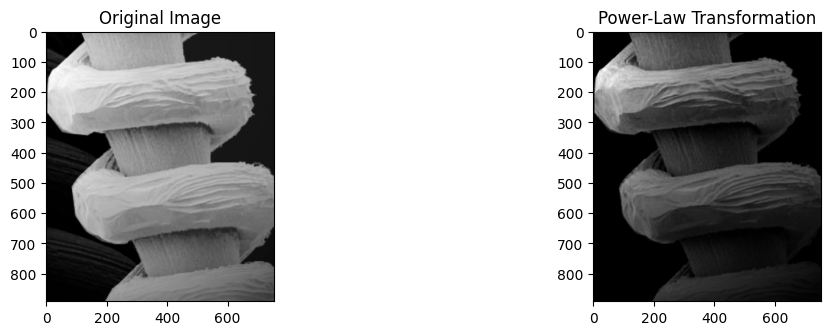

In [ ]:
r = plt.imread("image1.tif")

gamma = 1.5
s = np.power(r, gamma)
c = ((s - s.min()) / (s.max() - s.min())) * 255
s= c* s

plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(r, cmap='gray')
plt.title("Original Image")
plt.subplot(133)
plt.imshow(s, cmap="gray")
plt.title("Power-Law Transformation")

**Which function is suitable for which type of images?**

For the images which are too dark, the intensity values for all the images can be raised to make it lighter. Lower intensities should be increased to a larger extent than higher intensities. This can be achieved using log transoformation or power law transformation with a gamma value less than 1.Both log transformation and power law do the same task but powerlaw achieve much control over that by allowing us to tune the value of gamma.For images that are too bright, the opposite can be done; all of the pixels' intensities can be decreased to make the image darker. Lower intensity values should be reduced more drastically than higher intensity values. Inverse log transformation or a power law transformation with a gamma value greater than 1 can be used to accomplish this.



**Why is intensity scaling required before display?**

The intensity values may exceed the 0 to 255 range when log, inverse log, or power law transformations are applied. This is an invalid range for images. The values are returned to the appropriate range by using intensity scaling.

#Task 2


Gobal Histogram Equalization

In [ ]:
image = plt.imread("image2.tif")
original_image = np.copy(image)

In [ ]:
histogram, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))

In [ ]:
cdf=histogram.cumsum()

In [ ]:
cdf= ((cdf - cdf.min()) / (cdf.max() - cdf.min())) * 255
equalized_image= cdf[image]

In [ ]:
histogram2, bins = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))

Text(0.5, 1.0, 'Equalized Image')

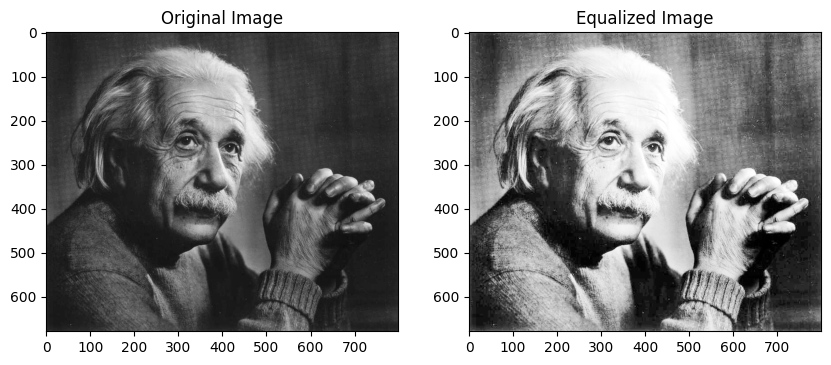

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")


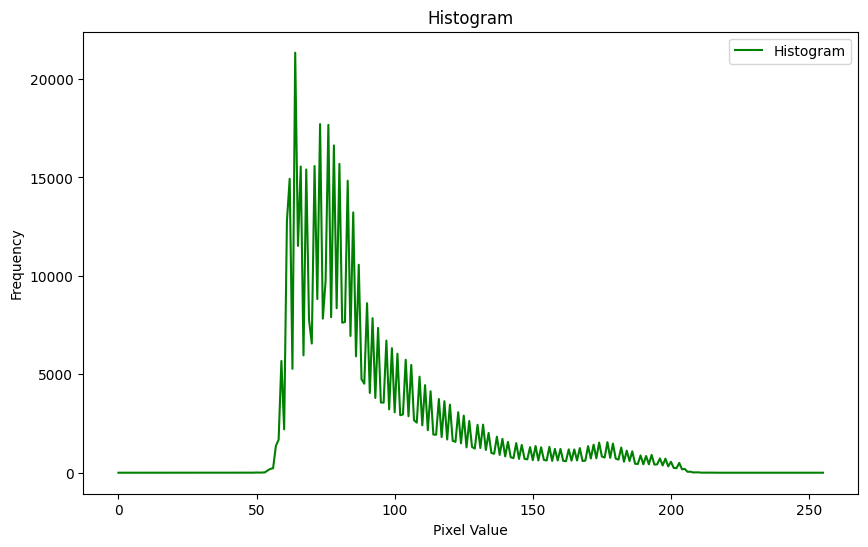

In [ ]:

plt.figure(figsize=(10, 6))

plt.plot(bins[:-1], histogram, color='g', label='Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()


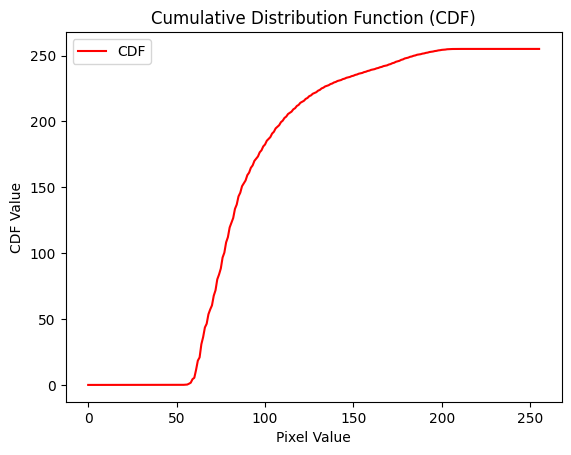

In [ ]:

plt.plot(bins[:-1], cdf, color='r', label='CDF')
plt.xlabel('Pixel Value')
plt.ylabel('CDF Value')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()



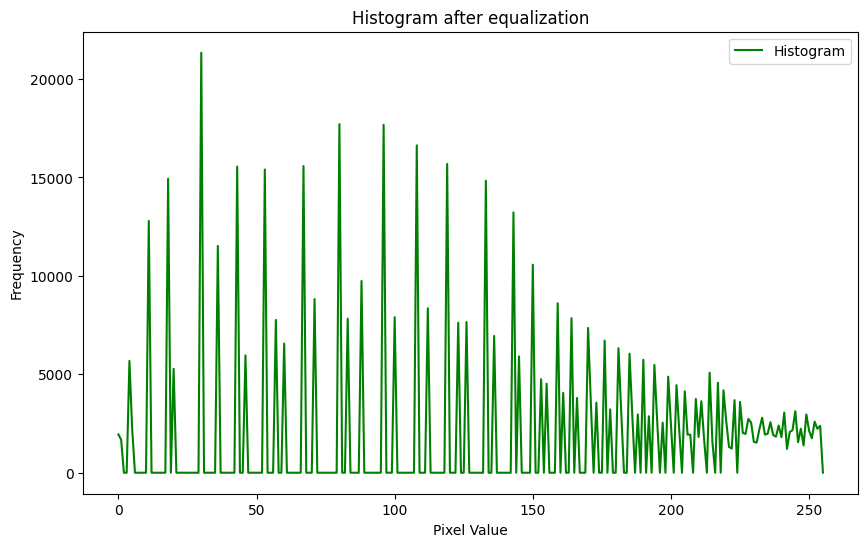

In [ ]:

plt.figure(figsize=(10, 6))

plt.plot(bins[:-1], histogram2, color='g', label='Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram after equalization')
plt.legend()


**Why repeated application of HE doesn't produce any further improvements on output images?**

The CDF for the image is already normalized after histogram equalization, which means that the intensity values are evenly distributed across the 0 to 255 range. The CDF will remain unchanged if it is normalized once more because it is already distributed equally. Therefore, further development is not observed.

#Task 3

Local Histogram Equalization

In [72]:
def local_histogram_equalization(image, tile_size=8):
    img_height, img_width = image.shape
    output_image = np.zeros_like(image)

    for y in range(0, img_height, tile_size):
        for x in range(0, img_width, tile_size):
            tile = image[y:y+tile_size, x:x+tile_size]
            equalized_tile = cv2.equalizeHist(tile)
            output_image[y:y+tile_size, x:x+tile_size] = equalized_tile

    return output_image

In [75]:
image_path = 'image3.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

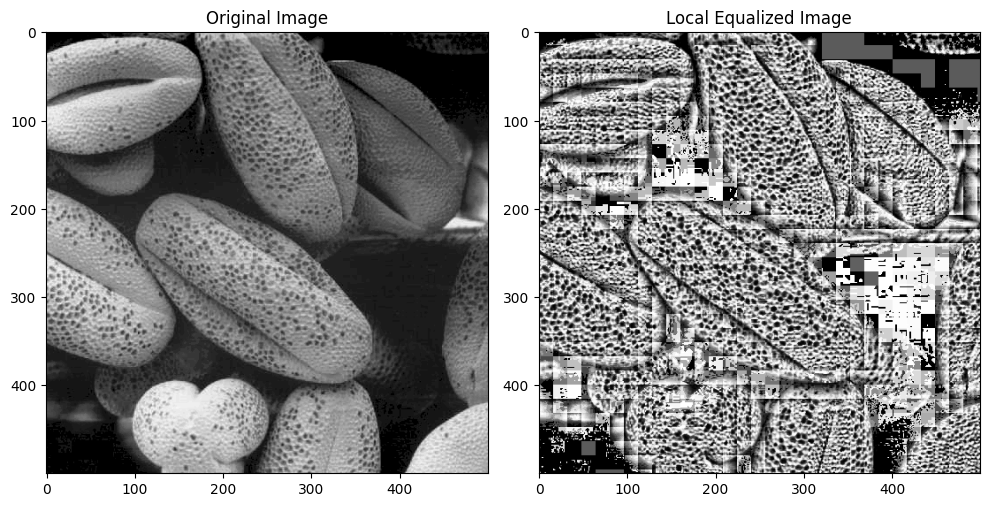

In [77]:
equalized_image = local_histogram_equalization(image, tile_size=16)


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Local Equalized Image")

plt.tight_layout()
plt.show()


**Why do you have annoying side effects at the boundary of local image regions.**

Local HE denotes the use of sliding windows for HE. HE is completed on a small window of the chosen image. The distribution between windows differs because HE is applied to chunks rather than the entire image. As a result, the transition between the equalized windows is not smooth.